In [1]:
!unzip data.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 450kB 36.1MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 3.8MB 33.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=432839ec383bf5773ab58adf6f8af0f48550fab438be1f734b0d7b056d51e7fe
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [59]:
# import modules


import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import matplotlib.pyplot as plt
import random
import os
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization

In [60]:
print(os.listdir())

['.config', 'training_set', 'data.zip', 'test_set', 'sample_data']


In [61]:

#paths to datasets


train="training_set/training_set/"
test="test_set/test_set/"

In [62]:
#constants


# fast_run=False
image_width=128
image_height=128
image_size=(image_width,image_height)
image_channels=3
batch_size=32
# epochs=1 if fast_run else 20
epochs=20

In [63]:
# cnn model creation and compilation



model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding='same',input_shape=(image_width,image_height,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation="softmax"))



model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [64]:
 model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 128, 128, 32)      320       
_________________________________________________________________
batch_normalization_24 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
batch_normalization_25 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 64)       

In [67]:
# calllbacks

earlystop=EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)
callbacks=[earlystop,learning_rate_reduction]


In [68]:
#data preparation

train_data=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)



test_data=ImageDataGenerator(rescale=1./255)



train_set=train_data.flow_from_directory(train,
target_size=image_size,
batch_size=batch_size,
class_mode='categorical',
color_mode='grayscale')



test_set=test_data.flow_from_directory(test,
target_size=image_size,
batch_size=batch_size,
class_mode='categorical',
color_mode='grayscale'
)

Found 8005 images belonging to 2 classes.
Found 1475 images belonging to 2 classes.


In [70]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [71]:
# training and validating

history=model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set,
    callbacks=callbacks
)




Epoch 1/20
251/251 [==============================] - 45s 180ms/step - loss: 0.6544 - accuracy: 0.6658 - val_loss: 0.5743 - val_accuracy: 0.7058
Epoch 2/20
251/251 [==============================] - 45s 180ms/step - loss: 0.5498 - accuracy: 0.7320 - val_loss: 0.5276 - val_accuracy: 0.7647
Epoch 3/20
251/251 [==============================] - 45s 181ms/step - loss: 0.5003 - accuracy: 0.7611 - val_loss: 0.4273 - val_accuracy: 0.8061
Epoch 4/20
251/251 [==============================] - 45s 181ms/step - loss: 0.4641 - accuracy: 0.7816 - val_loss: 0.4483 - val_accuracy: 0.8115
Epoch 5/20
251/251 [==============================] - 45s 181ms/step - loss: 0.4441 - accuracy: 0.7963 - val_loss: 0.6432 - val_accuracy: 0.7071
Epoch 6/20
251/251 [==============================] - 45s 180ms/step - loss: 0.4228 - accuracy: 0.8080 - val_loss: 0.4322 - val_accuracy: 0.8169
Epoch 7/20
251/251 [==============================] - 45s 181ms/step - loss: 0.4040 - accuracy: 0.8172 - val_loss: 0.5329 - val_ac

In [73]:

# saving model

model.save("catvsdog.h5")

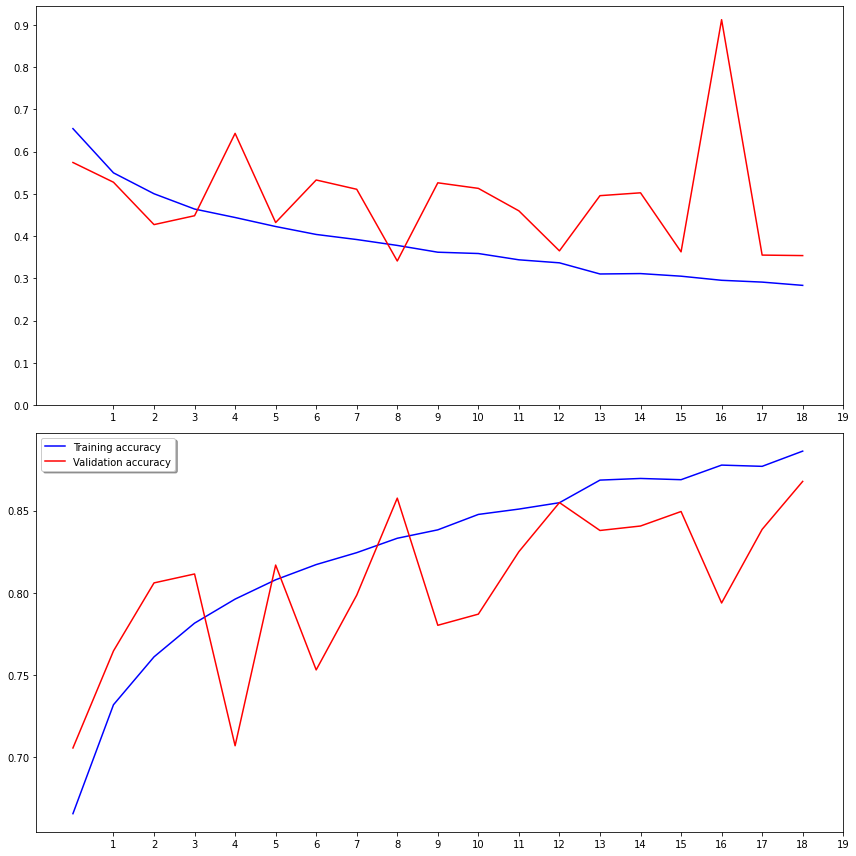

In [75]:
# visualizing results


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


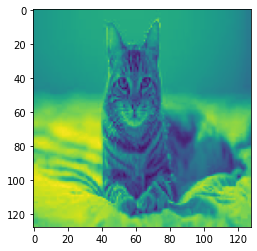

In [77]:
path="cat.jpg"  #enter  path of predecting image

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
test=load_img(path,grayscale=True,target_size=(image_size))
test1 = img_to_array(test)
test1.shape
import matplotlib.pyplot as plt

plt.imshow(test1.reshape(image_size))
test1=test1/255

In [81]:
y=model.predict(test1.reshape(1,128,128,1))
import numpy as np

p=np.argmax(y)
p

0